In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import smplotlib
import pandas as pd
import numpy as np
import cmasher as cmr
cmap = cmr.dusk
from tqdm import tqdm
import joblib 

import sys
sys.path.append("/home/jdli/pax")
import time
import os
import glob

In [38]:
root_dir = "/nfsdata/users/jdli_ny/xp_infers_v2_3/"

csv_file = glob.glob(root_dir+"gxp_chunk_1m*.csv")

print(len(csv_file))

210


In [39]:
li = []

for filename in tqdm(csv_file):
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
len(frame)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [13:26<00:00,  3.84s/it]


219197467

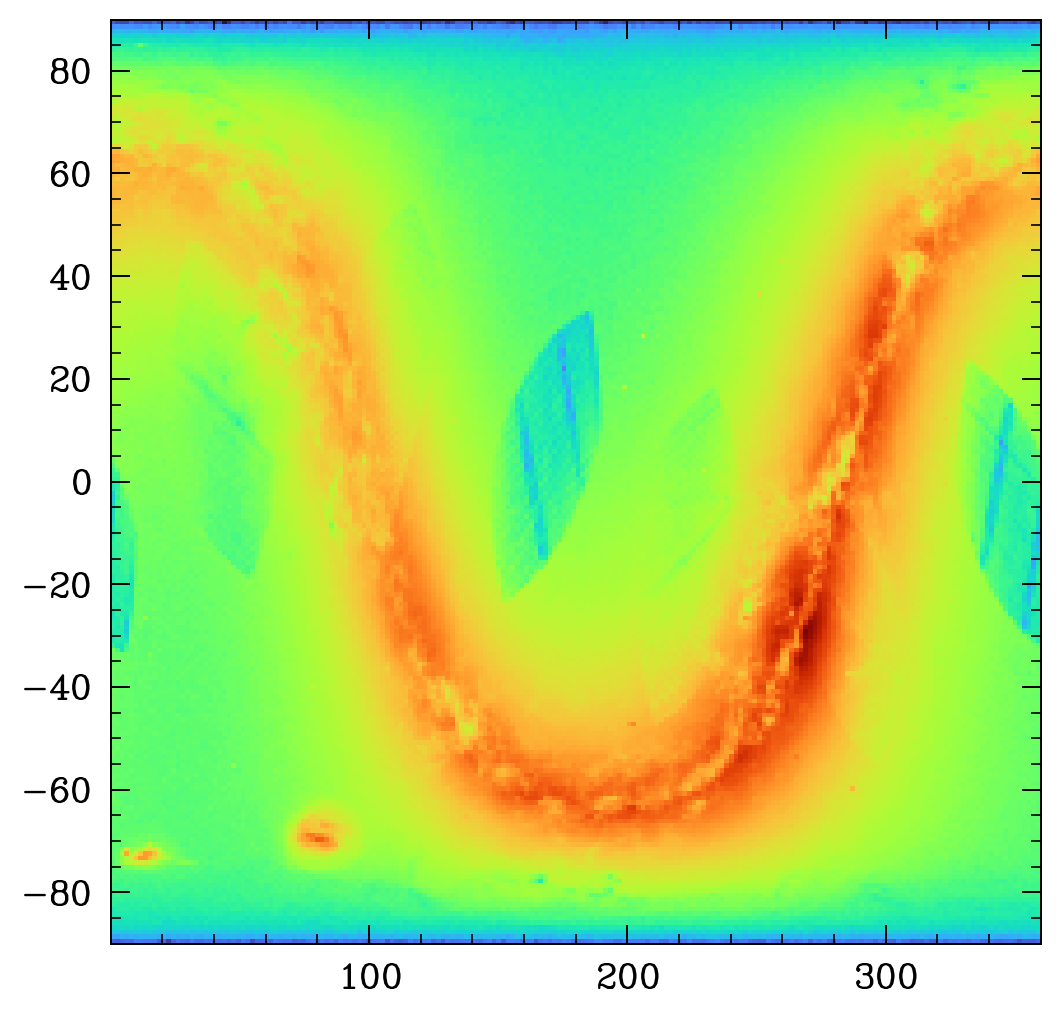

In [40]:
plt.hist2d(frame['ra'], frame['dec'], bins=200, norm=colors.LogNorm());

In [ ]:
frame.to_csv("/nfsdata/users/jdli_ny/JD_220m_v2_3.csv.gz", index=False, compression='gzip')

In [ ]:
# def decode_source_id(source_id_arr):
#     """
#     Decode a Gaia source_id and return the star's RA and Dec in degrees.
#     """
#     # Convert source_id to binary string with leading zeros
#     binary_str = np.vectorize(np.binary_repr)(source_id_arr, width=64)

#     # Extract RA and Dec bits and convert to signed integers
#     ra_bits = int(binary_str[:34], 2)
#     dec_bits = int(binary_str[34:68], 2)
#     # epoch_bits = int(binary_str[68:74], 2)

#     # Convert RA and Dec to degrees
#     ra = ra_bits / 2**31 * 360
#     dec = (dec_bits - 2**33) / 2**31 * 180

#     # Return RA and Dec in degrees
#     return {ra, dec}

# ra, dec = decode_source_id(frame['source_id'].values)

219.101622


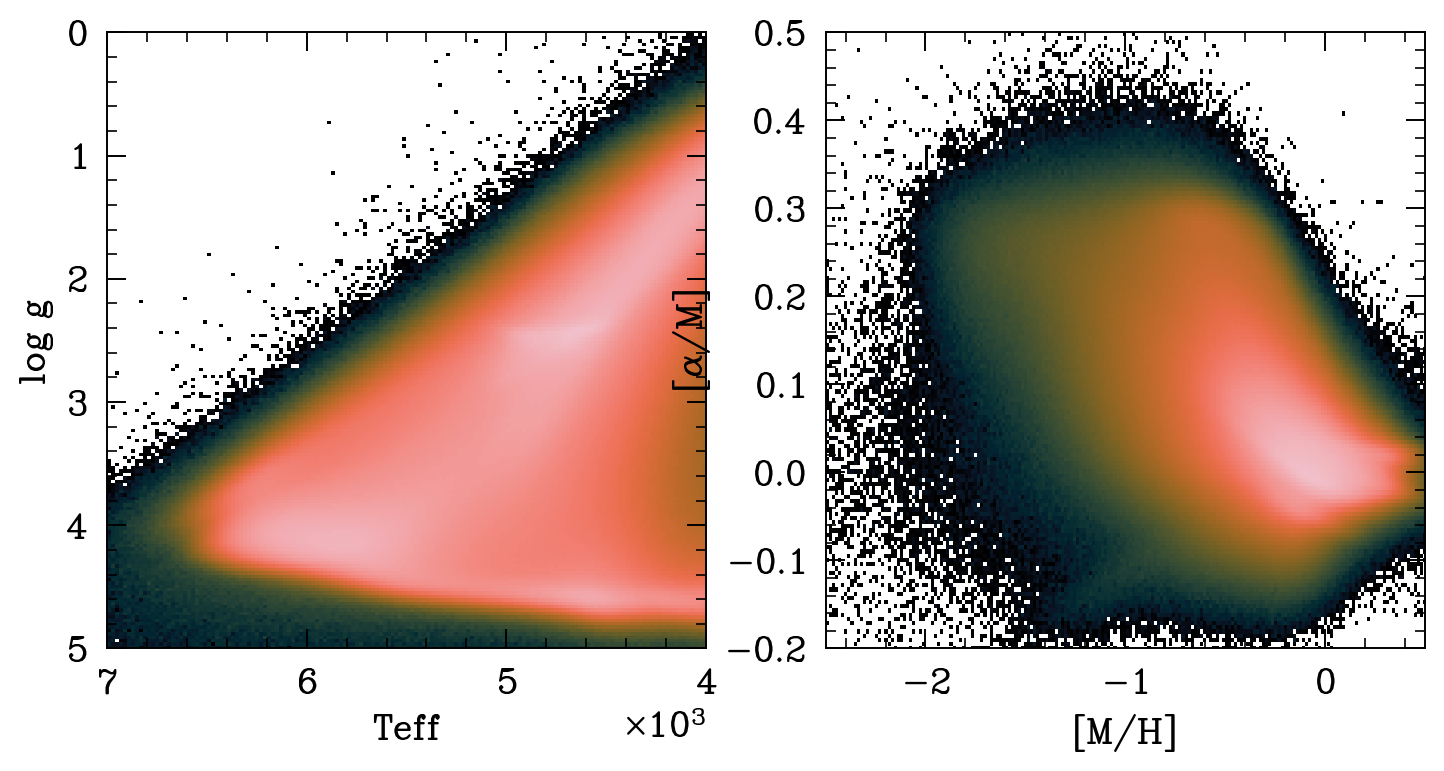

In [18]:
# (np.log10(np.abs(frame['aom_xp']) * frame['e_aom_xp']**-1)>np.log10(3))   &\
# (np.log10(np.abs(frame['moh_xp']) * frame['e_moh_xp']**-1)>np.log10(3))   &\
ind_cut =   (frame['moh_xp']>-2.5) & (frame['moh_xp']<0.6) &\
            (frame['teff_xp']>3000) & (frame['teff_xp']<7000) &\
            (frame['logg_xp']>0.) & (frame['logg_xp']<5.5) &\
            (frame['e_aom_xp']<1) & (frame['e_moh_xp']<1) &\
            (frame['aom_xp']>-1) & (frame['aom_xp']<1)

print(len(frame[ind_cut])/1e6)

fig, axs = plt.subplots(1,2, figsize=(8.5, 4))
ax1, ax2 = axs.ravel()

ax1.hist2d(frame['teff_xp'][ind_cut], frame['logg_xp'][ind_cut], 
           bins=200, norm=colors.LogNorm(), cmap='cmr.dusk');
ax2.hist2d(frame['moh_xp'][ind_cut], frame['aom_xp'][ind_cut], 
           bins=200, norm=colors.LogNorm(), cmap='cmr.dusk');

ax1.set_xlim([7000, 4000]);
ax1.set_ylim([5, 0]);
ax1.set_ylabel("log g");
ax1.set_xlabel("Teff");
ax2.set_xlabel("[M/H]");
ax2.set_ylabel(r"[$\alpha/M$]");
ax2.set_xlim([-2.5, 0.5]);
ax2.set_ylim([-0.2, 0.5]);

157.571609


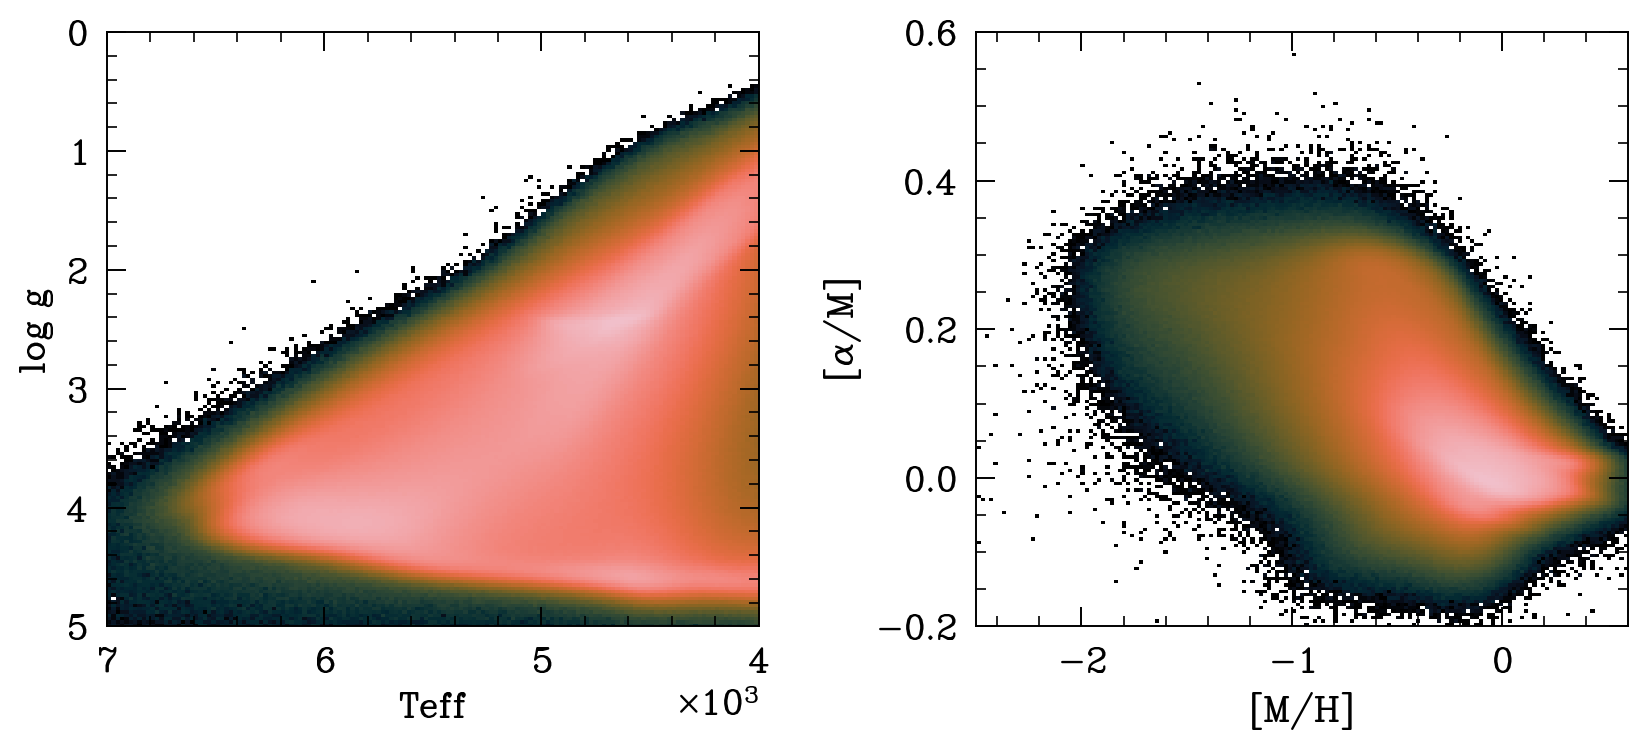

In [17]:
ind_cut =   (frame['moh_xp']>-3.)    & (frame['moh_xp']<1.) &\
            (frame['teff_xp']>3000.) & (frame['teff_xp']<7000) &\
            (frame['logg_xp']>0.)    & (frame['logg_xp']<6.) &\
            (frame['aom_xp']>-1)     & (frame['aom_xp']<1) &\
             (frame['e_aom_xp']<0.5)  & (frame['e_moh_xp']<1) &\
            (frame['teff_xp']*frame['e_teff_xp']**-1>5) &\
            (frame['logg_xp']*frame['e_logg_xp']**-1>5)

print(len(frame[ind_cut])/1e6)

fig, axs = plt.subplots(1,2, figsize=(8.5, 4))

ax1, ax2 = axs.ravel()

ax1.hist2d(frame['teff_xp'][ind_cut], frame['logg_xp'][ind_cut], 
           bins=200, norm=colors.LogNorm(), cmap='cmr.dusk');
ax2.hist2d(frame['moh_xp'][ind_cut], frame['aom_xp'][ind_cut], 
           bins=200, norm=colors.LogNorm(), cmap='cmr.dusk');

ax1.set_xlim([7000, 4000]);
ax1.set_ylim([5, 0]);
ax1.set_ylabel("log g");
ax1.set_xlabel("Teff");
ax2.set_xlabel("[M/H]");
ax2.set_ylabel(r"[$\alpha/M$]");
ax2.set_xlim([-2.5, 0.6]);
ax2.set_ylim([-0.2, 0.6]);
plt.tight_layout()

In [18]:
frame[ind_cut].to_csv("/nfsdata/users/jdli_ny/JD_160m_0421.csv", index=False)



102.007938


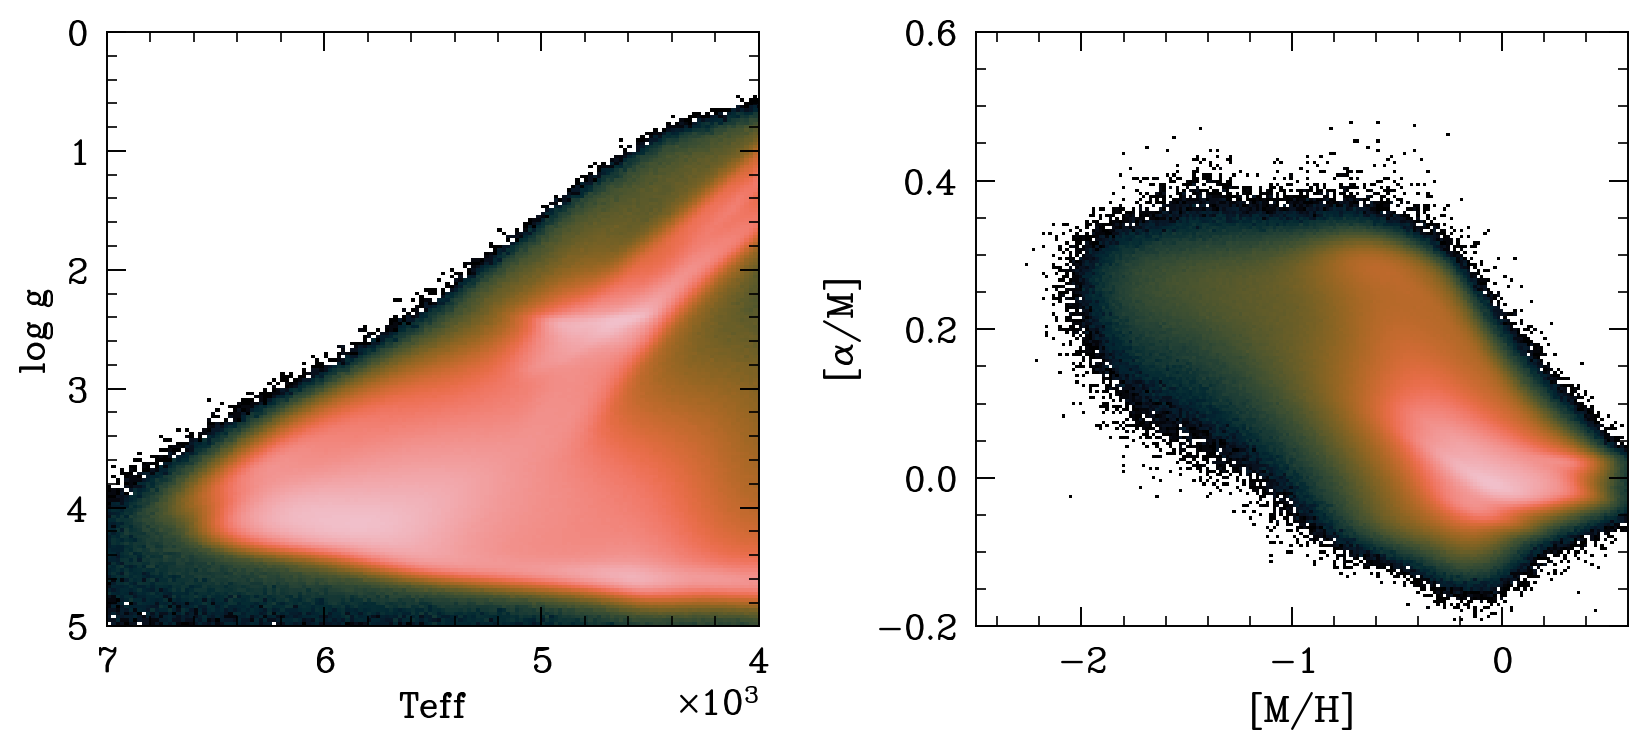

In [19]:
ind_cut =   (frame['moh_xp']>-3.)    & (frame['moh_xp']<1.) &\
            (frame['teff_xp']>3000.) & (frame['teff_xp']<7000) &\
            (frame['logg_xp']>0.)    & (frame['logg_xp']<6.) &\
            (frame['aom_xp']>-1)     & (frame['aom_xp']<1) &\
             (frame['e_aom_xp']<0.1)  & (frame['e_moh_xp']<0.3) &\
            (frame['teff_xp']*frame['e_teff_xp']**-1>10) &\
            (frame['logg_xp']*frame['e_logg_xp']**-1>10)

print(len(frame[ind_cut])/1e6)

fig, axs = plt.subplots(1,2, figsize=(8.5, 4))

ax1, ax2 = axs.ravel()

ax1.hist2d(frame['teff_xp'][ind_cut], frame['logg_xp'][ind_cut], 
           bins=200, norm=colors.LogNorm(), cmap='cmr.dusk');
ax2.hist2d(frame['moh_xp'][ind_cut], frame['aom_xp'][ind_cut], 
           bins=200, norm=colors.LogNorm(), cmap='cmr.dusk');

ax1.set_xlim([7000, 4000]);
ax1.set_ylim([5, 0]);
ax1.set_ylabel("log g");
ax1.set_xlabel("Teff");
ax2.set_xlabel("[M/H]");
ax2.set_ylabel(r"[$\alpha/M$]");
ax2.set_xlim([-2.5, 0.6]);
ax2.set_ylim([-0.2, 0.6]);
plt.tight_layout()

151560091
22403825
89.11938


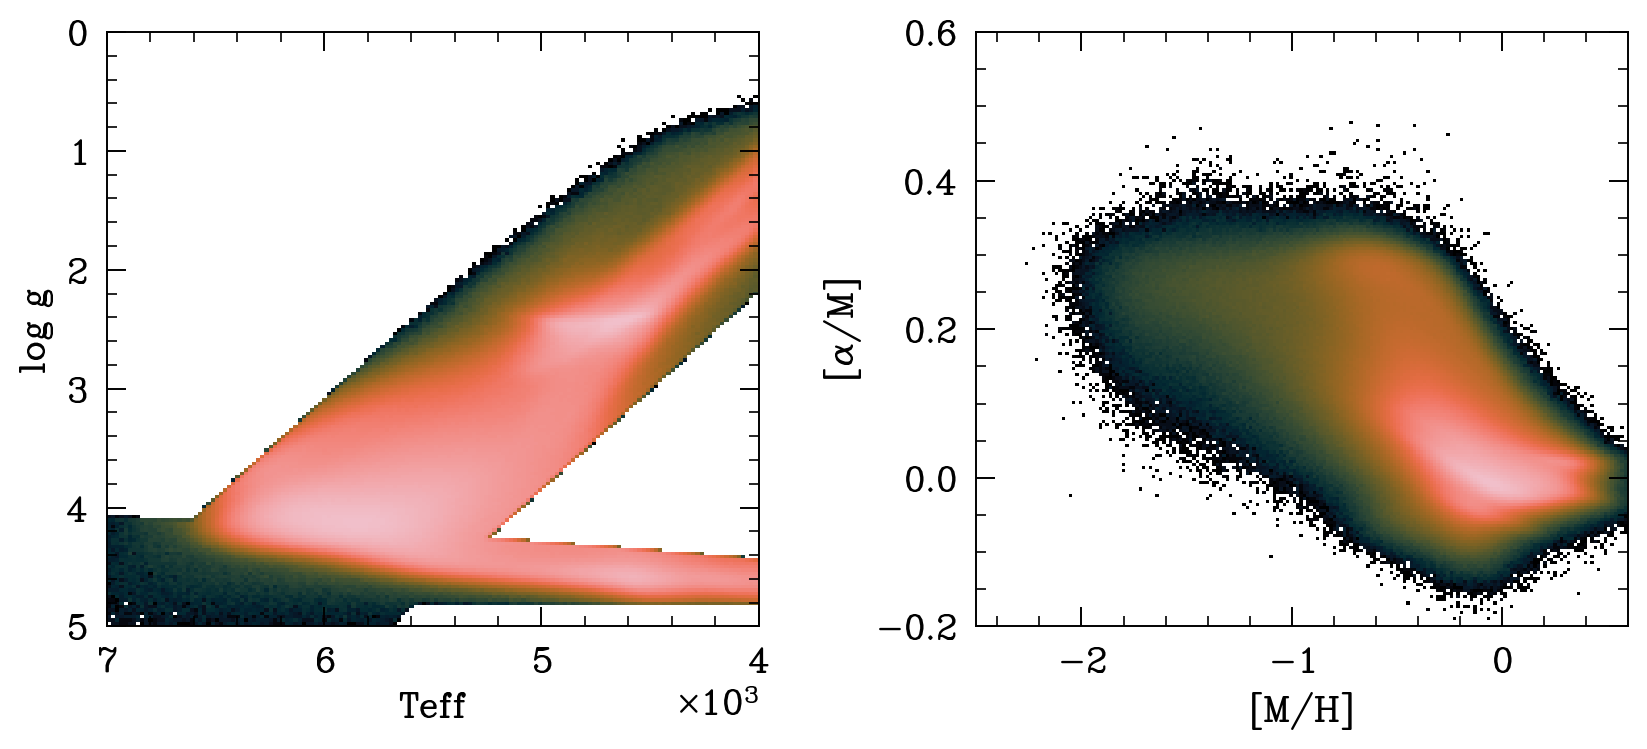

In [20]:
rg_select = (frame['logg_xp']<(5/3000)*(frame['teff_xp']-3000)+0.5) & (frame['logg_xp']>(5/3000)*(frame['teff_xp']-3000)-1.9)
print(len(frame[rg_select]))


ms_select = (frame['logg_xp'] > 4.2 - 1.5*np.log10(frame['teff_xp']/5777)) & (frame['logg_xp'] < 4.8)
print(len(frame[ms_select]))

ind_product = (rg_select | ms_select) & ind_cut
print(len(frame[ind_product])/1e6)


fig, axs = plt.subplots(1,2, figsize=(8.5, 4))

ax1, ax2 = axs.ravel()

ax1.hist2d(frame['teff_xp'][ind_product], frame['logg_xp'][ind_product], 
           bins=200, norm=colors.LogNorm(), cmap='cmr.dusk');
ax2.hist2d(frame['moh_xp'][ind_product], frame['aom_xp'][ind_product], 
           bins=200, norm=colors.LogNorm(), cmap='cmr.dusk');

ax1.set_xlim([7000, 4000]);
ax1.set_ylim([5, 0]);
ax1.set_ylabel("log g");
ax1.set_xlabel("Teff");
ax2.set_xlabel("[M/H]");
ax2.set_ylabel(r"[$\alpha/M$]");
ax2.set_xlim([-2.5, 0.6]);
ax2.set_ylim([-0.2, 0.6]);
plt.tight_layout()


In [21]:
frame[ind_product].to_csv("/nfsdata/users/jdli_ny/JD_89m_v2.csv", index=False)


151560091
22403825
45.220929


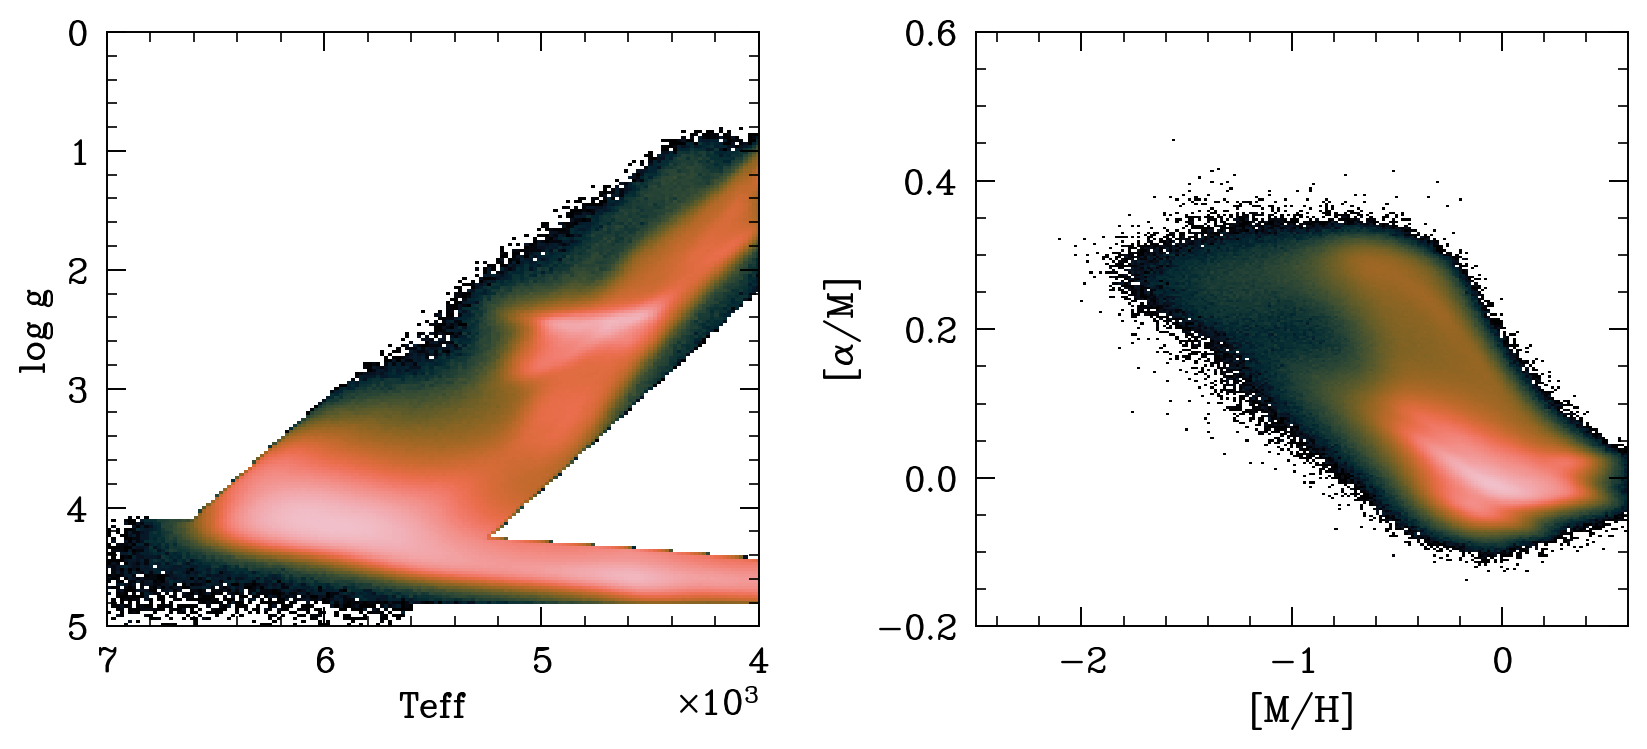

In [24]:
ind_cut =   (frame['moh_xp']>-3.)    & (frame['moh_xp']<1.) &\
            (frame['teff_xp']>3000.) & (frame['teff_xp']<7000) &\
            (frame['logg_xp']>0.)    & (frame['logg_xp']<6.) &\
            (frame['aom_xp']>-1)     & (frame['aom_xp']<1) &\
             (frame['e_aom_xp']<0.05)  & (frame['e_moh_xp']<0.2) &\
            (frame['teff_xp']*frame['e_teff_xp']**-1>20) &\
            (frame['logg_xp']*frame['e_logg_xp']**-1>20)

ind_product = (rg_select | ms_select) & ind_cut
print(int(len(frame[ind_product])/1e6))


fig, axs = plt.subplots(1,2, figsize=(8.5, 4))

ax1, ax2 = axs.ravel()

ax1.hist2d(frame['teff_xp'][ind_product], frame['logg_xp'][ind_product], 
           bins=200, norm=colors.LogNorm(), cmap='cmr.dusk');
ax2.hist2d(frame['moh_xp'][ind_product], frame['aom_xp'][ind_product], 
           bins=200, norm=colors.LogNorm(), cmap='cmr.dusk');

ax1.set_xlim([7000, 4000]);
ax1.set_ylim([5, 0]);
ax1.set_ylabel("log g");
ax1.set_xlabel("Teff");
ax2.set_xlabel("[M/H]");
ax2.set_ylabel(r"[$\alpha/M$]");
ax2.set_xlim([-2.5, 0.6]);
ax2.set_ylim([-0.2, 0.6]);
plt.tight_layout()


In [ ]:
frame[ind_product].to_csv("/nfsdata/users/jdli_ny/JD_45m_v2.csv", index=False)


10


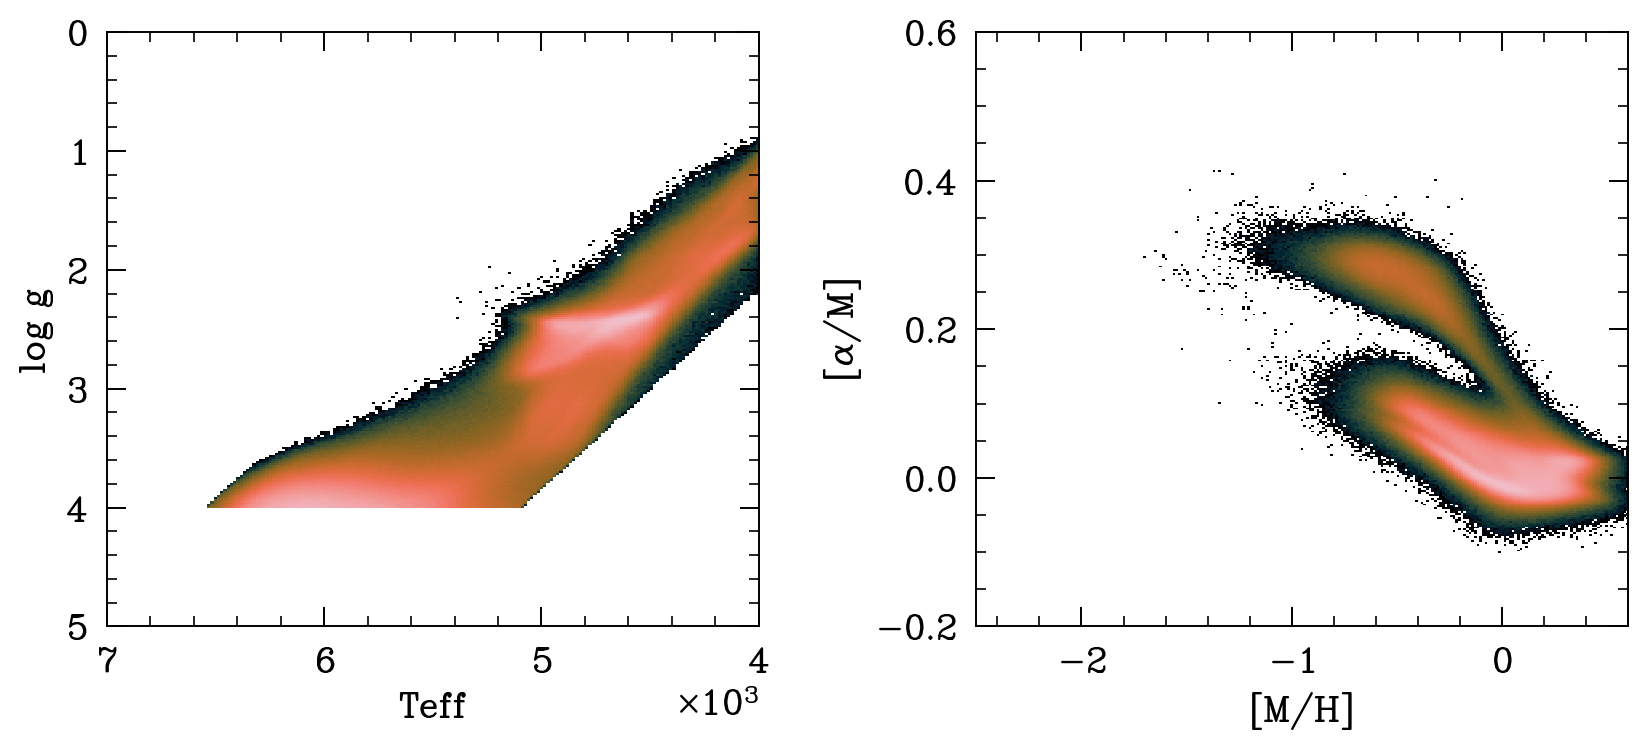

In [27]:
ind_cut =   (frame['moh_xp']>-3.)    & (frame['moh_xp']<1.) &\
            (frame['teff_xp']>3000.) & (frame['teff_xp']<7000) &\
            (frame['logg_xp']>0.)    & (frame['logg_xp']<3.5) &\
            (frame['aom_xp']>-1)     & (frame['aom_xp']<1) &\
             (frame['e_aom_xp']<0.05)  & (frame['e_moh_xp']<0.2) &\
            (frame['teff_xp']*frame['e_teff_xp']**-1>20) &\
            (frame['logg_xp']*frame['e_logg_xp']**-1>20)

ind_good_rgb = rg_select & ind_cut
print(int(len(frame[ind_good_rgb])/1e6))


fig, axs = plt.subplots(1,2, figsize=(8.5, 4))

ax1, ax2 = axs.ravel()

ax1.hist2d(frame['teff_xp'][ind_good_rgb], frame['logg_xp'][ind_good_rgb], 
           bins=200, norm=colors.LogNorm(), cmap='cmr.dusk');
ax2.hist2d(frame['moh_xp'][ind_good_rgb], frame['aom_xp'][ind_good_rgb], 
           bins=200, norm=colors.LogNorm(), cmap='cmr.dusk');

ax1.set_xlim([7000, 4000]);
ax1.set_ylim([5, 0]);
ax1.set_ylabel("log g");
ax1.set_xlabel("Teff");
ax2.set_xlabel("[M/H]");
ax2.set_ylabel(r"[$\alpha/M$]");
ax2.set_xlim([-2.5, 0.6]);
ax2.set_ylim([-0.2, 0.6]);
plt.tight_layout()


28


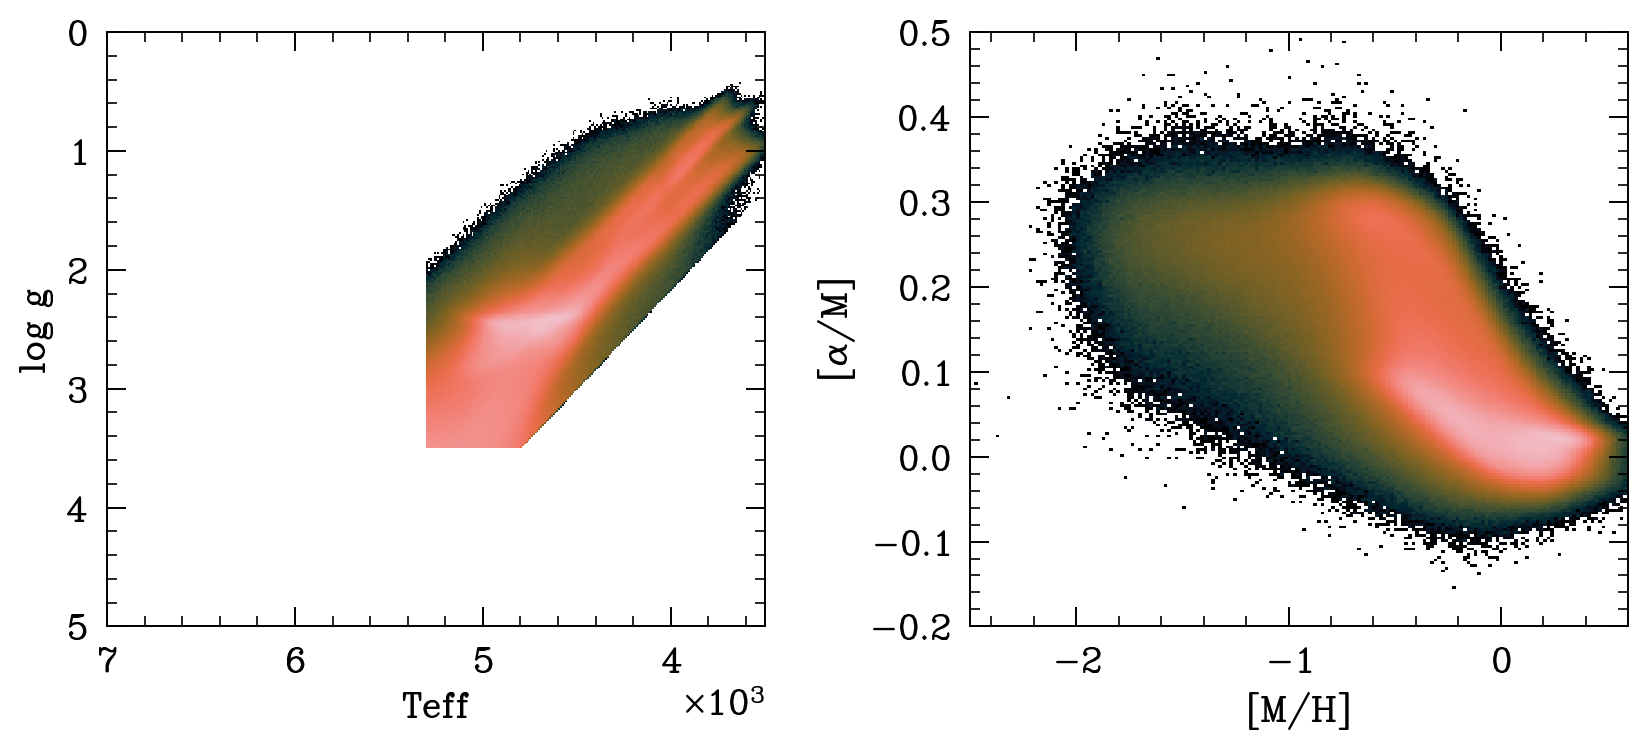

In [41]:
ind_cut =   (frame['moh_xp']>-3.)    & (frame['moh_xp']<1.) &\
            (frame['aom_xp']>-1)     & (frame['aom_xp']<1) &\
            (frame['e_aom_xp']<0.5)  & (frame['e_moh_xp']<1) &\
            (frame['teff_xp']*frame['e_teff_xp']**-1>10) &\
            (frame['logg_xp']*frame['e_logg_xp']**-1>10)

rg_select = (frame['logg_xp']<(5/3000)*(frame['teff_xp']-3000)+0.5) &\
            (frame['logg_xp']>(5/3000)*(frame['teff_xp']-3000)-1.9) &\
            (frame['teff_xp']>3000.) & (frame['teff_xp']<5300) &\
            (frame['logg_xp']>0.)    & (frame['logg_xp']<3.5)

ind_good_rgb = rg_select & ind_cut
print(int(len(frame[ind_good_rgb])/1e6))

fig, axs = plt.subplots(1,2, figsize=(8.5, 4))

ax1, ax2 = axs.ravel()

ax1.hist2d(frame['teff_xp'][ind_good_rgb], frame['logg_xp'][ind_good_rgb], 
           bins=200, norm=colors.LogNorm(), cmap='cmr.dusk');
ax2.hist2d(frame['moh_xp'][ind_good_rgb], frame['aom_xp'][ind_good_rgb], 
           bins=200, norm=colors.LogNorm(), cmap='cmr.dusk');

ax1.set_xlim([7000, 3500]);
ax1.set_ylim([5, 0]);
ax1.set_ylabel("log g");
ax1.set_xlabel("Teff");
ax2.set_xlabel("[M/H]");
ax2.set_ylabel(r"[$\alpha/M$]");
ax2.set_xlim([-2.5, 0.6]);
ax2.set_ylim([-0.2, 0.5]);

plt.tight_layout()


In [42]:
# frame[ind_product].to_csv("/nfsdata/users/jdli_ny/JDrgb_77m_v2.csv", index=False)

frame[ind_good_rgb].to_csv("/nfsdata/users/jdli_ny/JDrgb_28m_v2_3.csv.gz", 
                          compression='gzip', index=False)

# mpoor cut

In [ ]:
ind_cut =   (frame['moh_xp']>-2.5) & (frame['moh_xp']<-0.5) &\
            (frame['teff_xp']>3000) & (frame['teff_xp']<7000) &\
            (frame['logg_xp']>0.) & (frame['logg_xp']<5.5) &\
            (frame['e_aom_xp']<0.1) & (frame['e_moh_xp']<0.3) &\
            (frame['aom_xp']>-1) & (frame['aom_xp']<1) &\
            (frame['teff_xp']*frame['e_teff_xp']**-1>5) &\
            (frame['logg_xp']*frame['e_logg_xp']**-1>5)

print(len(frame[ind_cut])/1e6)

fig, axs = plt.subplots(1,2, figsize=(8.5, 4))

ax1, ax2 = axs.ravel()

ax1.hist2d(frame['teff_xp'][ind_cut], frame['logg_xp'][ind_cut], 
           bins=200, norm=colors.LogNorm(), cmap='cmr.dusk');
ax2.hist2d(frame['moh_xp'][ind_cut], frame['aom_xp'][ind_cut], 
           bins=200, norm=colors.LogNorm(), cmap='cmr.dusk');

ax1.set_xlim([7000, 4000]);
ax1.set_ylim([5, 0]);
ax1.set_ylabel("log g");
ax1.set_xlabel("Teff");
ax2.set_xlabel("[M/H]");
ax2.set_ylabel(r"[$\alpha/M$]");
ax2.set_xlim([-2.5, 0.6]);
ax2.set_ylim([-0.2, 0.6]);


In [67]:
# frame[ind_cut].to_csv("/nfsdata/users/jdli_ny/JD_mpoor_11m.csv", index=False)